# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [00:26, 6.39MB/s]                              


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


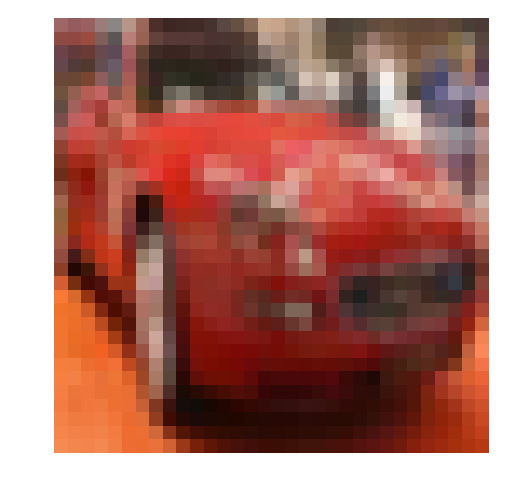

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return x/x.max()


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
from sklearn.preprocessing import MultiLabelBinarizer 
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    enc_labels = np.zeros((len(x),10))
    for i, label in enumerate(x):
        enc_labels[i][label] = 1
    return enc_labels


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(
        dtype=tf.float32,
        shape=(None, *image_shape),
        name="x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(
        dtype=tf.float32,
        shape=(None, n_classes),
        name="y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder( 
        dtype=tf.float32,
        name="keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    F_W = tf.Variable(tf.truncated_normal((*conv_ksize, x_tensor.shape[3].value, conv_num_outputs), stddev=0.1,))
    F_b = tf.Variable(tf.zeros(conv_num_outputs))
    
    convo = tf.nn.conv2d(x_tensor, F_W, [1, *conv_strides,1], 'SAME') + F_b
    relu = tf.nn.relu(convo)
    pool = tf.nn.max_pool(convo, [1, *pool_ksize, 1], [1, *pool_strides, 1], 'SAME')
    
    return pool 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor,
                                             num_outputs,
                                             activation_fn=tf.nn.relu)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor,
                                             num_outputs,
                                             activation_fn=None)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [12]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    x_tensor = conv2d_maxpool(x, 8, (2,2), (1,1), (2,2), (1,1))
    x_tensor = conv2d_maxpool(x_tensor, 16, (2,2), (2,2), (2,2), (2,2))
    x_tensor = conv2d_maxpool(x_tensor, 32, (2,2), (1,1), (2,2), (1,1))
    x_tensor = tf.nn.dropout(x_tensor,keep_prob)
    print(x_tensor.shape)
    
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    x_tensor = flatten(x_tensor)
    x_tensor = tf.nn.dropout(x_tensor,keep_prob)
    
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    x_tensor = fully_conn(x_tensor, 16)
    x_tensor = fully_conn(x_tensor, 24)
    x_tensor = tf.nn.dropout(x_tensor,keep_prob)
    x_tensor = fully_conn(x_tensor, 32)
    
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    x_tensor = output(x_tensor, 10)
    
    
    # TODO: return output
    return x_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 8, 8, 32)
(?, 8, 8, 32)
Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    train_feed_dict = {keep_prob:keep_probability,
                       x:feature_batch,
                       y:label_batch}
    session.run(optimizer, feed_dict=train_feed_dict)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    current_cost = session.run(
        cost,
        feed_dict={x: feature_batch, 
                   y: label_batch,
                   keep_prob: 1.0})
    valid_accuracy = sess.run(
        accuracy,
        feed_dict={x: valid_features, 
                   y: valid_labels, 
                   keep_prob: 1.0})
    print('Cost: {:<8.3} Valid Accuracy: {:<5.3}'.format(
        current_cost,
        valid_accuracy))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [15]:
# TODO: Tune Parameters
epochs = 400
batch_size = 1024
keep_probability = .8

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Cost: 2.28     Valid Accuracy: 0.158
Epoch  2, CIFAR-10 Batch 1:  Cost: 2.24     Valid Accuracy: 0.197
Epoch  3, CIFAR-10 Batch 1:  Cost: 2.16     Valid Accuracy: 0.205
Epoch  4, CIFAR-10 Batch 1:  Cost: 2.07     Valid Accuracy: 0.226
Epoch  5, CIFAR-10 Batch 1:  Cost: 2.0      Valid Accuracy: 0.25 
Epoch  6, CIFAR-10 Batch 1:  Cost: 1.94     Valid Accuracy: 0.289
Epoch  7, CIFAR-10 Batch 1:  Cost: 1.89     Valid Accuracy: 0.322
Epoch  8, CIFAR-10 Batch 1:  Cost: 1.85     Valid Accuracy: 0.336
Epoch  9, CIFAR-10 Batch 1:  Cost: 1.81     Valid Accuracy: 0.356
Epoch 10, CIFAR-10 Batch 1:  Cost: 1.77     Valid Accuracy: 0.368
Epoch 11, CIFAR-10 Batch 1:  Cost: 1.76     Valid Accuracy: 0.378
Epoch 12, CIFAR-10 Batch 1:  Cost: 1.72     Valid Accuracy: 0.383
Epoch 13, CIFAR-10 Batch 1:  Cost: 1.71     Valid Accuracy: 0.387
Epoch 14, CIFAR-10 Batch 1:  Cost: 1.68     Valid Accuracy: 0.391
Epoch 15, CIFAR-10 Batch 1:  Cost

Epoch 125, CIFAR-10 Batch 1:  Cost: 0.905    Valid Accuracy: 0.561
Epoch 126, CIFAR-10 Batch 1:  Cost: 0.896    Valid Accuracy: 0.566
Epoch 127, CIFAR-10 Batch 1:  Cost: 0.903    Valid Accuracy: 0.563
Epoch 128, CIFAR-10 Batch 1:  Cost: 0.891    Valid Accuracy: 0.564
Epoch 129, CIFAR-10 Batch 1:  Cost: 0.889    Valid Accuracy: 0.564
Epoch 130, CIFAR-10 Batch 1:  Cost: 0.894    Valid Accuracy: 0.565
Epoch 131, CIFAR-10 Batch 1:  Cost: 0.881    Valid Accuracy: 0.56 
Epoch 132, CIFAR-10 Batch 1:  Cost: 0.877    Valid Accuracy: 0.566
Epoch 133, CIFAR-10 Batch 1:  Cost: 0.871    Valid Accuracy: 0.569
Epoch 134, CIFAR-10 Batch 1:  Cost: 0.864    Valid Accuracy: 0.566
Epoch 135, CIFAR-10 Batch 1:  Cost: 0.877    Valid Accuracy: 0.568
Epoch 136, CIFAR-10 Batch 1:  Cost: 0.864    Valid Accuracy: 0.565
Epoch 137, CIFAR-10 Batch 1:  Cost: 0.856    Valid Accuracy: 0.567
Epoch 138, CIFAR-10 Batch 1:  Cost: 0.858    Valid Accuracy: 0.564
Epoch 139, CIFAR-10 Batch 1:  Cost: 0.853    Valid Accuracy: 0

Epoch 248, CIFAR-10 Batch 1:  Cost: 0.591    Valid Accuracy: 0.585
Epoch 249, CIFAR-10 Batch 1:  Cost: 0.571    Valid Accuracy: 0.586
Epoch 250, CIFAR-10 Batch 1:  Cost: 0.576    Valid Accuracy: 0.584
Epoch 251, CIFAR-10 Batch 1:  Cost: 0.587    Valid Accuracy: 0.585
Epoch 252, CIFAR-10 Batch 1:  Cost: 0.574    Valid Accuracy: 0.584
Epoch 253, CIFAR-10 Batch 1:  Cost: 0.57     Valid Accuracy: 0.59 
Epoch 254, CIFAR-10 Batch 1:  Cost: 0.57     Valid Accuracy: 0.586
Epoch 255, CIFAR-10 Batch 1:  Cost: 0.572    Valid Accuracy: 0.583
Epoch 256, CIFAR-10 Batch 1:  Cost: 0.565    Valid Accuracy: 0.589
Epoch 257, CIFAR-10 Batch 1:  Cost: 0.567    Valid Accuracy: 0.589
Epoch 258, CIFAR-10 Batch 1:  Cost: 0.57     Valid Accuracy: 0.585
Epoch 259, CIFAR-10 Batch 1:  Cost: 0.567    Valid Accuracy: 0.585
Epoch 260, CIFAR-10 Batch 1:  Cost: 0.573    Valid Accuracy: 0.585
Epoch 261, CIFAR-10 Batch 1:  Cost: 0.555    Valid Accuracy: 0.583
Epoch 262, CIFAR-10 Batch 1:  Cost: 0.557    Valid Accuracy: 0

Epoch 371, CIFAR-10 Batch 1:  Cost: 0.42     Valid Accuracy: 0.591
Epoch 372, CIFAR-10 Batch 1:  Cost: 0.438    Valid Accuracy: 0.591
Epoch 373, CIFAR-10 Batch 1:  Cost: 0.448    Valid Accuracy: 0.585
Epoch 374, CIFAR-10 Batch 1:  Cost: 0.417    Valid Accuracy: 0.591
Epoch 375, CIFAR-10 Batch 1:  Cost: 0.426    Valid Accuracy: 0.592
Epoch 376, CIFAR-10 Batch 1:  Cost: 0.426    Valid Accuracy: 0.586
Epoch 377, CIFAR-10 Batch 1:  Cost: 0.444    Valid Accuracy: 0.591
Epoch 378, CIFAR-10 Batch 1:  Cost: 0.427    Valid Accuracy: 0.594
Epoch 379, CIFAR-10 Batch 1:  Cost: 0.431    Valid Accuracy: 0.587
Epoch 380, CIFAR-10 Batch 1:  Cost: 0.424    Valid Accuracy: 0.587
Epoch 381, CIFAR-10 Batch 1:  Cost: 0.441    Valid Accuracy: 0.582
Epoch 382, CIFAR-10 Batch 1:  Cost: 0.431    Valid Accuracy: 0.585
Epoch 383, CIFAR-10 Batch 1:  Cost: 0.44     Valid Accuracy: 0.582
Epoch 384, CIFAR-10 Batch 1:  Cost: 0.451    Valid Accuracy: 0.578
Epoch 385, CIFAR-10 Batch 1:  Cost: 0.457    Valid Accuracy: 0

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Cost: 2.3      Valid Accuracy: 0.137
Epoch  1, CIFAR-10 Batch 2:  Cost: 2.28     Valid Accuracy: 0.103
Epoch  1, CIFAR-10 Batch 3:  Cost: 2.25     Valid Accuracy: 0.148
Epoch  1, CIFAR-10 Batch 4:  Cost: 2.2      Valid Accuracy: 0.161
Epoch  1, CIFAR-10 Batch 5:  Cost: 2.14     Valid Accuracy: 0.166
Epoch  2, CIFAR-10 Batch 1:  Cost: 2.12     Valid Accuracy: 0.191
Epoch  2, CIFAR-10 Batch 2:  Cost: 2.04     Valid Accuracy: 0.24 
Epoch  2, CIFAR-10 Batch 3:  Cost: 2.0      Valid Accuracy: 0.264
Epoch  2, CIFAR-10 Batch 4:  Cost: 1.96     Valid Accuracy: 0.28 
Epoch  2, CIFAR-10 Batch 5:  Cost: 1.93     Valid Accuracy: 0.304
Epoch  3, CIFAR-10 Batch 1:  Cost: 1.94     Valid Accuracy: 0.31 
Epoch  3, CIFAR-10 Batch 2:  Cost: 1.87     Valid Accuracy: 0.325
Epoch  3, CIFAR-10 Batch 3:  Cost: 1.81     Valid Accuracy: 0.336
Epoch  3, CIFAR-10 Batch 4:  Cost: 1.79     Valid Accuracy: 0.355
Epoch  3, CIFAR-10 Batch 5:  Cost: 1.79     Valid Accuracy: 0.35

Epoch 25, CIFAR-10 Batch 5:  Cost: 1.18     Valid Accuracy: 0.552
Epoch 26, CIFAR-10 Batch 1:  Cost: 1.2      Valid Accuracy: 0.56 
Epoch 26, CIFAR-10 Batch 2:  Cost: 1.18     Valid Accuracy: 0.555
Epoch 26, CIFAR-10 Batch 3:  Cost: 1.12     Valid Accuracy: 0.556
Epoch 26, CIFAR-10 Batch 4:  Cost: 1.13     Valid Accuracy: 0.56 
Epoch 26, CIFAR-10 Batch 5:  Cost: 1.17     Valid Accuracy: 0.557
Epoch 27, CIFAR-10 Batch 1:  Cost: 1.19     Valid Accuracy: 0.561
Epoch 27, CIFAR-10 Batch 2:  Cost: 1.17     Valid Accuracy: 0.559
Epoch 27, CIFAR-10 Batch 3:  Cost: 1.1      Valid Accuracy: 0.562
Epoch 27, CIFAR-10 Batch 4:  Cost: 1.11     Valid Accuracy: 0.561
Epoch 27, CIFAR-10 Batch 5:  Cost: 1.15     Valid Accuracy: 0.566
Epoch 28, CIFAR-10 Batch 1:  Cost: 1.18     Valid Accuracy: 0.562
Epoch 28, CIFAR-10 Batch 2:  Cost: 1.16     Valid Accuracy: 0.559
Epoch 28, CIFAR-10 Batch 3:  Cost: 1.1      Valid Accuracy: 0.562
Epoch 28, CIFAR-10 Batch 4:  Cost: 1.11     Valid Accuracy: 0.565
Epoch 28, 

Epoch 50, CIFAR-10 Batch 5:  Cost: 0.965    Valid Accuracy: 0.609
Epoch 51, CIFAR-10 Batch 1:  Cost: 1.01     Valid Accuracy: 0.61 
Epoch 51, CIFAR-10 Batch 2:  Cost: 0.973    Valid Accuracy: 0.606
Epoch 51, CIFAR-10 Batch 3:  Cost: 0.92     Valid Accuracy: 0.61 
Epoch 51, CIFAR-10 Batch 4:  Cost: 0.952    Valid Accuracy: 0.609
Epoch 51, CIFAR-10 Batch 5:  Cost: 0.969    Valid Accuracy: 0.604
Epoch 52, CIFAR-10 Batch 1:  Cost: 1.03     Valid Accuracy: 0.608
Epoch 52, CIFAR-10 Batch 2:  Cost: 0.965    Valid Accuracy: 0.605
Epoch 52, CIFAR-10 Batch 3:  Cost: 0.913    Valid Accuracy: 0.61 
Epoch 52, CIFAR-10 Batch 4:  Cost: 0.958    Valid Accuracy: 0.607
Epoch 52, CIFAR-10 Batch 5:  Cost: 0.956    Valid Accuracy: 0.608
Epoch 53, CIFAR-10 Batch 1:  Cost: 1.0      Valid Accuracy: 0.613
Epoch 53, CIFAR-10 Batch 2:  Cost: 0.958    Valid Accuracy: 0.609
Epoch 53, CIFAR-10 Batch 3:  Cost: 0.909    Valid Accuracy: 0.613
Epoch 53, CIFAR-10 Batch 4:  Cost: 0.938    Valid Accuracy: 0.614
Epoch 53, 

Epoch 75, CIFAR-10 Batch 5:  Cost: 0.851    Valid Accuracy: 0.626
Epoch 76, CIFAR-10 Batch 1:  Cost: 0.93     Valid Accuracy: 0.625
Epoch 76, CIFAR-10 Batch 2:  Cost: 0.854    Valid Accuracy: 0.628
Epoch 76, CIFAR-10 Batch 3:  Cost: 0.818    Valid Accuracy: 0.633
Epoch 76, CIFAR-10 Batch 4:  Cost: 0.85     Valid Accuracy: 0.631
Epoch 76, CIFAR-10 Batch 5:  Cost: 0.852    Valid Accuracy: 0.626
Epoch 77, CIFAR-10 Batch 1:  Cost: 0.918    Valid Accuracy: 0.628
Epoch 77, CIFAR-10 Batch 2:  Cost: 0.862    Valid Accuracy: 0.629
Epoch 77, CIFAR-10 Batch 3:  Cost: 0.813    Valid Accuracy: 0.633
Epoch 77, CIFAR-10 Batch 4:  Cost: 0.854    Valid Accuracy: 0.631
Epoch 77, CIFAR-10 Batch 5:  Cost: 0.841    Valid Accuracy: 0.628
Epoch 78, CIFAR-10 Batch 1:  Cost: 0.914    Valid Accuracy: 0.629
Epoch 78, CIFAR-10 Batch 2:  Cost: 0.849    Valid Accuracy: 0.633
Epoch 78, CIFAR-10 Batch 3:  Cost: 0.812    Valid Accuracy: 0.635
Epoch 78, CIFAR-10 Batch 4:  Cost: 0.852    Valid Accuracy: 0.632
Epoch 78, 

Epoch 100, CIFAR-10 Batch 5:  Cost: 0.795    Valid Accuracy: 0.639
Epoch 101, CIFAR-10 Batch 1:  Cost: 0.866    Valid Accuracy: 0.64 
Epoch 101, CIFAR-10 Batch 2:  Cost: 0.802    Valid Accuracy: 0.641
Epoch 101, CIFAR-10 Batch 3:  Cost: 0.778    Valid Accuracy: 0.646
Epoch 101, CIFAR-10 Batch 4:  Cost: 0.804    Valid Accuracy: 0.647
Epoch 101, CIFAR-10 Batch 5:  Cost: 0.793    Valid Accuracy: 0.638
Epoch 102, CIFAR-10 Batch 1:  Cost: 0.852    Valid Accuracy: 0.643
Epoch 102, CIFAR-10 Batch 2:  Cost: 0.798    Valid Accuracy: 0.647
Epoch 102, CIFAR-10 Batch 3:  Cost: 0.765    Valid Accuracy: 0.644
Epoch 102, CIFAR-10 Batch 4:  Cost: 0.81     Valid Accuracy: 0.643
Epoch 102, CIFAR-10 Batch 5:  Cost: 0.783    Valid Accuracy: 0.646
Epoch 103, CIFAR-10 Batch 1:  Cost: 0.863    Valid Accuracy: 0.644
Epoch 103, CIFAR-10 Batch 2:  Cost: 0.792    Valid Accuracy: 0.648
Epoch 103, CIFAR-10 Batch 3:  Cost: 0.768    Valid Accuracy: 0.648
Epoch 103, CIFAR-10 Batch 4:  Cost: 0.807    Valid Accuracy: 0

Epoch 125, CIFAR-10 Batch 3:  Cost: 0.741    Valid Accuracy: 0.658
Epoch 125, CIFAR-10 Batch 4:  Cost: 0.769    Valid Accuracy: 0.656
Epoch 125, CIFAR-10 Batch 5:  Cost: 0.757    Valid Accuracy: 0.654
Epoch 126, CIFAR-10 Batch 1:  Cost: 0.831    Valid Accuracy: 0.649
Epoch 126, CIFAR-10 Batch 2:  Cost: 0.75     Valid Accuracy: 0.659
Epoch 126, CIFAR-10 Batch 3:  Cost: 0.739    Valid Accuracy: 0.662
Epoch 126, CIFAR-10 Batch 4:  Cost: 0.763    Valid Accuracy: 0.658
Epoch 126, CIFAR-10 Batch 5:  Cost: 0.752    Valid Accuracy: 0.654
Epoch 127, CIFAR-10 Batch 1:  Cost: 0.809    Valid Accuracy: 0.654
Epoch 127, CIFAR-10 Batch 2:  Cost: 0.745    Valid Accuracy: 0.661
Epoch 127, CIFAR-10 Batch 3:  Cost: 0.734    Valid Accuracy: 0.66 
Epoch 127, CIFAR-10 Batch 4:  Cost: 0.756    Valid Accuracy: 0.658
Epoch 127, CIFAR-10 Batch 5:  Cost: 0.747    Valid Accuracy: 0.658
Epoch 128, CIFAR-10 Batch 1:  Cost: 0.822    Valid Accuracy: 0.654
Epoch 128, CIFAR-10 Batch 2:  Cost: 0.757    Valid Accuracy: 0

Epoch 150, CIFAR-10 Batch 1:  Cost: 0.78     Valid Accuracy: 0.664
Epoch 150, CIFAR-10 Batch 2:  Cost: 0.718    Valid Accuracy: 0.665
Epoch 150, CIFAR-10 Batch 3:  Cost: 0.72     Valid Accuracy: 0.66 
Epoch 150, CIFAR-10 Batch 4:  Cost: 0.728    Valid Accuracy: 0.668
Epoch 150, CIFAR-10 Batch 5:  Cost: 0.727    Valid Accuracy: 0.658
Epoch 151, CIFAR-10 Batch 1:  Cost: 0.775    Valid Accuracy: 0.661
Epoch 151, CIFAR-10 Batch 2:  Cost: 0.712    Valid Accuracy: 0.666
Epoch 151, CIFAR-10 Batch 3:  Cost: 0.715    Valid Accuracy: 0.666
Epoch 151, CIFAR-10 Batch 4:  Cost: 0.734    Valid Accuracy: 0.663
Epoch 151, CIFAR-10 Batch 5:  Cost: 0.712    Valid Accuracy: 0.667
Epoch 152, CIFAR-10 Batch 1:  Cost: 0.792    Valid Accuracy: 0.66 
Epoch 152, CIFAR-10 Batch 2:  Cost: 0.71     Valid Accuracy: 0.665
Epoch 152, CIFAR-10 Batch 3:  Cost: 0.713    Valid Accuracy: 0.667
Epoch 152, CIFAR-10 Batch 4:  Cost: 0.724    Valid Accuracy: 0.668
Epoch 152, CIFAR-10 Batch 5:  Cost: 0.719    Valid Accuracy: 0

Epoch 174, CIFAR-10 Batch 4:  Cost: 0.692    Valid Accuracy: 0.678
Epoch 174, CIFAR-10 Batch 5:  Cost: 0.699    Valid Accuracy: 0.674
Epoch 175, CIFAR-10 Batch 1:  Cost: 0.742    Valid Accuracy: 0.678
Epoch 175, CIFAR-10 Batch 2:  Cost: 0.684    Valid Accuracy: 0.671
Epoch 175, CIFAR-10 Batch 3:  Cost: 0.687    Valid Accuracy: 0.674
Epoch 175, CIFAR-10 Batch 4:  Cost: 0.696    Valid Accuracy: 0.676
Epoch 175, CIFAR-10 Batch 5:  Cost: 0.695    Valid Accuracy: 0.674
Epoch 176, CIFAR-10 Batch 1:  Cost: 0.747    Valid Accuracy: 0.675
Epoch 176, CIFAR-10 Batch 2:  Cost: 0.68     Valid Accuracy: 0.676
Epoch 176, CIFAR-10 Batch 3:  Cost: 0.696    Valid Accuracy: 0.669
Epoch 176, CIFAR-10 Batch 4:  Cost: 0.701    Valid Accuracy: 0.676
Epoch 176, CIFAR-10 Batch 5:  Cost: 0.714    Valid Accuracy: 0.67 
Epoch 177, CIFAR-10 Batch 1:  Cost: 0.748    Valid Accuracy: 0.673
Epoch 177, CIFAR-10 Batch 2:  Cost: 0.689    Valid Accuracy: 0.674
Epoch 177, CIFAR-10 Batch 3:  Cost: 0.699    Valid Accuracy: 0

Epoch 199, CIFAR-10 Batch 2:  Cost: 0.662    Valid Accuracy: 0.684
Epoch 199, CIFAR-10 Batch 3:  Cost: 0.675    Valid Accuracy: 0.673
Epoch 199, CIFAR-10 Batch 4:  Cost: 0.667    Valid Accuracy: 0.684
Epoch 199, CIFAR-10 Batch 5:  Cost: 0.672    Valid Accuracy: 0.678
Epoch 200, CIFAR-10 Batch 1:  Cost: 0.724    Valid Accuracy: 0.679
Epoch 200, CIFAR-10 Batch 2:  Cost: 0.661    Valid Accuracy: 0.682
Epoch 200, CIFAR-10 Batch 3:  Cost: 0.682    Valid Accuracy: 0.68 
Epoch 200, CIFAR-10 Batch 4:  Cost: 0.682    Valid Accuracy: 0.681
Epoch 200, CIFAR-10 Batch 5:  Cost: 0.68     Valid Accuracy: 0.681
Epoch 201, CIFAR-10 Batch 1:  Cost: 0.735    Valid Accuracy: 0.676
Epoch 201, CIFAR-10 Batch 2:  Cost: 0.661    Valid Accuracy: 0.679
Epoch 201, CIFAR-10 Batch 3:  Cost: 0.676    Valid Accuracy: 0.678
Epoch 201, CIFAR-10 Batch 4:  Cost: 0.67     Valid Accuracy: 0.681
Epoch 201, CIFAR-10 Batch 5:  Cost: 0.669    Valid Accuracy: 0.68 
Epoch 202, CIFAR-10 Batch 1:  Cost: 0.723    Valid Accuracy: 0

Epoch 223, CIFAR-10 Batch 5:  Cost: 0.671    Valid Accuracy: 0.681
Epoch 224, CIFAR-10 Batch 1:  Cost: 0.705    Valid Accuracy: 0.687
Epoch 224, CIFAR-10 Batch 2:  Cost: 0.646    Valid Accuracy: 0.689
Epoch 224, CIFAR-10 Batch 3:  Cost: 0.666    Valid Accuracy: 0.687
Epoch 224, CIFAR-10 Batch 4:  Cost: 0.669    Valid Accuracy: 0.684
Epoch 224, CIFAR-10 Batch 5:  Cost: 0.662    Valid Accuracy: 0.687
Epoch 225, CIFAR-10 Batch 1:  Cost: 0.706    Valid Accuracy: 0.68 
Epoch 225, CIFAR-10 Batch 2:  Cost: 0.646    Valid Accuracy: 0.694
Epoch 225, CIFAR-10 Batch 3:  Cost: 0.664    Valid Accuracy: 0.687
Epoch 225, CIFAR-10 Batch 4:  Cost: 0.656    Valid Accuracy: 0.687
Epoch 225, CIFAR-10 Batch 5:  Cost: 0.656    Valid Accuracy: 0.69 
Epoch 226, CIFAR-10 Batch 1:  Cost: 0.705    Valid Accuracy: 0.685
Epoch 226, CIFAR-10 Batch 2:  Cost: 0.645    Valid Accuracy: 0.688
Epoch 226, CIFAR-10 Batch 3:  Cost: 0.661    Valid Accuracy: 0.684
Epoch 226, CIFAR-10 Batch 4:  Cost: 0.662    Valid Accuracy: 0

Epoch 248, CIFAR-10 Batch 3:  Cost: 0.644    Valid Accuracy: 0.691
Epoch 248, CIFAR-10 Batch 4:  Cost: 0.63     Valid Accuracy: 0.689
Epoch 248, CIFAR-10 Batch 5:  Cost: 0.655    Valid Accuracy: 0.686
Epoch 249, CIFAR-10 Batch 1:  Cost: 0.679    Valid Accuracy: 0.686
Epoch 249, CIFAR-10 Batch 2:  Cost: 0.628    Valid Accuracy: 0.691
Epoch 249, CIFAR-10 Batch 3:  Cost: 0.645    Valid Accuracy: 0.691
Epoch 249, CIFAR-10 Batch 4:  Cost: 0.632    Valid Accuracy: 0.687
Epoch 249, CIFAR-10 Batch 5:  Cost: 0.648    Valid Accuracy: 0.69 
Epoch 250, CIFAR-10 Batch 1:  Cost: 0.685    Valid Accuracy: 0.683
Epoch 250, CIFAR-10 Batch 2:  Cost: 0.644    Valid Accuracy: 0.694
Epoch 250, CIFAR-10 Batch 3:  Cost: 0.648    Valid Accuracy: 0.692
Epoch 250, CIFAR-10 Batch 4:  Cost: 0.629    Valid Accuracy: 0.69 
Epoch 250, CIFAR-10 Batch 5:  Cost: 0.644    Valid Accuracy: 0.693
Epoch 251, CIFAR-10 Batch 1:  Cost: 0.673    Valid Accuracy: 0.691
Epoch 251, CIFAR-10 Batch 2:  Cost: 0.624    Valid Accuracy: 0

Epoch 273, CIFAR-10 Batch 1:  Cost: 0.672    Valid Accuracy: 0.689
Epoch 273, CIFAR-10 Batch 2:  Cost: 0.62     Valid Accuracy: 0.695
Epoch 273, CIFAR-10 Batch 3:  Cost: 0.641    Valid Accuracy: 0.695
Epoch 273, CIFAR-10 Batch 4:  Cost: 0.614    Valid Accuracy: 0.695
Epoch 273, CIFAR-10 Batch 5:  Cost: 0.635    Valid Accuracy: 0.694
Epoch 274, CIFAR-10 Batch 1:  Cost: 0.671    Valid Accuracy: 0.689
Epoch 274, CIFAR-10 Batch 2:  Cost: 0.616    Valid Accuracy: 0.699
Epoch 274, CIFAR-10 Batch 3:  Cost: 0.655    Valid Accuracy: 0.687
Epoch 274, CIFAR-10 Batch 4:  Cost: 0.625    Valid Accuracy: 0.689
Epoch 274, CIFAR-10 Batch 5:  Cost: 0.629    Valid Accuracy: 0.69 
Epoch 275, CIFAR-10 Batch 1:  Cost: 0.673    Valid Accuracy: 0.681
Epoch 275, CIFAR-10 Batch 2:  Cost: 0.628    Valid Accuracy: 0.692
Epoch 275, CIFAR-10 Batch 3:  Cost: 0.642    Valid Accuracy: 0.692
Epoch 275, CIFAR-10 Batch 4:  Cost: 0.613    Valid Accuracy: 0.693
Epoch 275, CIFAR-10 Batch 5:  Cost: 0.643    Valid Accuracy: 0

Epoch 297, CIFAR-10 Batch 4:  Cost: 0.604    Valid Accuracy: 0.694
Epoch 297, CIFAR-10 Batch 5:  Cost: 0.637    Valid Accuracy: 0.693
Epoch 298, CIFAR-10 Batch 1:  Cost: 0.666    Valid Accuracy: 0.691
Epoch 298, CIFAR-10 Batch 2:  Cost: 0.618    Valid Accuracy: 0.691
Epoch 298, CIFAR-10 Batch 3:  Cost: 0.633    Valid Accuracy: 0.693
Epoch 298, CIFAR-10 Batch 4:  Cost: 0.601    Valid Accuracy: 0.694
Epoch 298, CIFAR-10 Batch 5:  Cost: 0.617    Valid Accuracy: 0.693
Epoch 299, CIFAR-10 Batch 1:  Cost: 0.659    Valid Accuracy: 0.695
Epoch 299, CIFAR-10 Batch 2:  Cost: 0.617    Valid Accuracy: 0.693
Epoch 299, CIFAR-10 Batch 3:  Cost: 0.624    Valid Accuracy: 0.696
Epoch 299, CIFAR-10 Batch 4:  Cost: 0.605    Valid Accuracy: 0.697
Epoch 299, CIFAR-10 Batch 5:  Cost: 0.627    Valid Accuracy: 0.694
Epoch 300, CIFAR-10 Batch 1:  Cost: 0.646    Valid Accuracy: 0.695
Epoch 300, CIFAR-10 Batch 2:  Cost: 0.611    Valid Accuracy: 0.694
Epoch 300, CIFAR-10 Batch 3:  Cost: 0.635    Valid Accuracy: 0

Epoch 322, CIFAR-10 Batch 2:  Cost: 0.615    Valid Accuracy: 0.689
Epoch 322, CIFAR-10 Batch 3:  Cost: 0.625    Valid Accuracy: 0.69 
Epoch 322, CIFAR-10 Batch 4:  Cost: 0.586    Valid Accuracy: 0.693
Epoch 322, CIFAR-10 Batch 5:  Cost: 0.62     Valid Accuracy: 0.695
Epoch 323, CIFAR-10 Batch 1:  Cost: 0.641    Valid Accuracy: 0.692
Epoch 323, CIFAR-10 Batch 2:  Cost: 0.608    Valid Accuracy: 0.687
Epoch 323, CIFAR-10 Batch 3:  Cost: 0.619    Valid Accuracy: 0.694
Epoch 323, CIFAR-10 Batch 4:  Cost: 0.578    Valid Accuracy: 0.694
Epoch 323, CIFAR-10 Batch 5:  Cost: 0.616    Valid Accuracy: 0.697
Epoch 324, CIFAR-10 Batch 1:  Cost: 0.643    Valid Accuracy: 0.691
Epoch 324, CIFAR-10 Batch 2:  Cost: 0.619    Valid Accuracy: 0.689
Epoch 324, CIFAR-10 Batch 3:  Cost: 0.627    Valid Accuracy: 0.689
Epoch 324, CIFAR-10 Batch 4:  Cost: 0.597    Valid Accuracy: 0.691
Epoch 324, CIFAR-10 Batch 5:  Cost: 0.62     Valid Accuracy: 0.699
Epoch 325, CIFAR-10 Batch 1:  Cost: 0.647    Valid Accuracy: 0

Epoch 346, CIFAR-10 Batch 5:  Cost: 0.609    Valid Accuracy: 0.694
Epoch 347, CIFAR-10 Batch 1:  Cost: 0.64     Valid Accuracy: 0.692
Epoch 347, CIFAR-10 Batch 2:  Cost: 0.6      Valid Accuracy: 0.696
Epoch 347, CIFAR-10 Batch 3:  Cost: 0.605    Valid Accuracy: 0.69 
Epoch 347, CIFAR-10 Batch 4:  Cost: 0.579    Valid Accuracy: 0.693
Epoch 347, CIFAR-10 Batch 5:  Cost: 0.616    Valid Accuracy: 0.692
Epoch 348, CIFAR-10 Batch 1:  Cost: 0.643    Valid Accuracy: 0.689
Epoch 348, CIFAR-10 Batch 2:  Cost: 0.599    Valid Accuracy: 0.694
Epoch 348, CIFAR-10 Batch 3:  Cost: 0.601    Valid Accuracy: 0.697
Epoch 348, CIFAR-10 Batch 4:  Cost: 0.587    Valid Accuracy: 0.69 
Epoch 348, CIFAR-10 Batch 5:  Cost: 0.634    Valid Accuracy: 0.69 
Epoch 349, CIFAR-10 Batch 1:  Cost: 0.631    Valid Accuracy: 0.69 
Epoch 349, CIFAR-10 Batch 2:  Cost: 0.6      Valid Accuracy: 0.693
Epoch 349, CIFAR-10 Batch 3:  Cost: 0.607    Valid Accuracy: 0.693
Epoch 349, CIFAR-10 Batch 4:  Cost: 0.583    Valid Accuracy: 0

Epoch 371, CIFAR-10 Batch 3:  Cost: 0.61     Valid Accuracy: 0.694
Epoch 371, CIFAR-10 Batch 4:  Cost: 0.57     Valid Accuracy: 0.696
Epoch 371, CIFAR-10 Batch 5:  Cost: 0.609    Valid Accuracy: 0.694
Epoch 372, CIFAR-10 Batch 1:  Cost: 0.633    Valid Accuracy: 0.695
Epoch 372, CIFAR-10 Batch 2:  Cost: 0.588    Valid Accuracy: 0.698
Epoch 372, CIFAR-10 Batch 3:  Cost: 0.594    Valid Accuracy: 0.695
Epoch 372, CIFAR-10 Batch 4:  Cost: 0.58     Valid Accuracy: 0.697
Epoch 372, CIFAR-10 Batch 5:  Cost: 0.609    Valid Accuracy: 0.697
Epoch 373, CIFAR-10 Batch 1:  Cost: 0.622    Valid Accuracy: 0.701
Epoch 373, CIFAR-10 Batch 2:  Cost: 0.591    Valid Accuracy: 0.697
Epoch 373, CIFAR-10 Batch 3:  Cost: 0.59     Valid Accuracy: 0.691
Epoch 373, CIFAR-10 Batch 4:  Cost: 0.572    Valid Accuracy: 0.696
Epoch 373, CIFAR-10 Batch 5:  Cost: 0.602    Valid Accuracy: 0.697
Epoch 374, CIFAR-10 Batch 1:  Cost: 0.627    Valid Accuracy: 0.696
Epoch 374, CIFAR-10 Batch 2:  Cost: 0.605    Valid Accuracy: 0

Epoch 396, CIFAR-10 Batch 1:  Cost: 0.629    Valid Accuracy: 0.692
Epoch 396, CIFAR-10 Batch 2:  Cost: 0.575    Valid Accuracy: 0.695
Epoch 396, CIFAR-10 Batch 3:  Cost: 0.589    Valid Accuracy: 0.699
Epoch 396, CIFAR-10 Batch 4:  Cost: 0.569    Valid Accuracy: 0.693
Epoch 396, CIFAR-10 Batch 5:  Cost: 0.608    Valid Accuracy: 0.699
Epoch 397, CIFAR-10 Batch 1:  Cost: 0.613    Valid Accuracy: 0.699
Epoch 397, CIFAR-10 Batch 2:  Cost: 0.59     Valid Accuracy: 0.702
Epoch 397, CIFAR-10 Batch 3:  Cost: 0.582    Valid Accuracy: 0.7  
Epoch 397, CIFAR-10 Batch 4:  Cost: 0.557    Valid Accuracy: 0.698
Epoch 397, CIFAR-10 Batch 5:  Cost: 0.603    Valid Accuracy: 0.698
Epoch 398, CIFAR-10 Batch 1:  Cost: 0.624    Valid Accuracy: 0.695
Epoch 398, CIFAR-10 Batch 2:  Cost: 0.585    Valid Accuracy: 0.698
Epoch 398, CIFAR-10 Batch 3:  Cost: 0.597    Valid Accuracy: 0.695
Epoch 398, CIFAR-10 Batch 4:  Cost: 0.563    Valid Accuracy: 0.701
Epoch 398, CIFAR-10 Batch 5:  Cost: 0.597    Valid Accuracy: 0

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6868881583213806



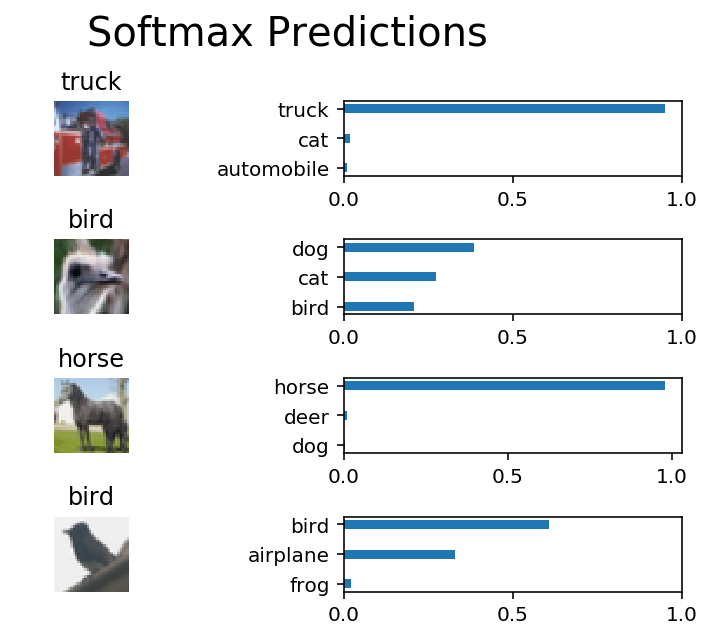

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.